# 데이터프레임과 시리즈

In [2]:
import pandas as pd
pd.read_excel("course_participants.xlsx")

,user_id,name,age,country,score,continent
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Tim,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [3]:
data = [["Mark", 55, "Italy", 4.5, "Europe"],
        ["John", 33, "USA", 6.7, "America"],
        ["Tim", 41, "USA", 3.9, "America"],
        ["Jenny", 12, "Germany", 9.0, "Europe"]]
df = pd.DataFrame(data = data,
                  columns=["name", "age", "country",
                           "score", "continent"],
                 index=[1001, 1000, 1002, 1003])
df

,name,age,country,score,continent
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1001 to 1003
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4 non-null      object 
 1   age        4 non-null      int64  
 2   country    4 non-null      object 
 3   score      4 non-null      float64
 4   continent  4 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 192.0+ bytes


## 인덱스

In [5]:
df.index

Int64Index([1001, 1000, 1002, 1003], dtype='int64')

In [6]:
df.index.name = "user_id"
df

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [7]:
# reset_index는 인덱스 열을 일반 열로 바꾸고
# 기본 인덱스를 인덱스로 사용합니다. 결과 데이터프레임은
# 처음에 엑셀에서 불러온 것과 일치합니다
df.reset_index()

,user_id,name,age,country,score,continent
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Tim,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [8]:
# 여기서 reset_index는 "user_id" 열을 일반적인 열로 바꾸고,
# set_index는 "name" 열을 인덱스로 바꿉니다
df.reset_index().set_index("name")

,user_id,age,country,score,continent
name,,,,,
Mark,1001,55,Italy,4.5,Europe
John,1000,33,USA,6.7,America
Tim,1002,41,USA,3.9,America
Jenny,1003,12,Germany,9.0,Europe


In [9]:
df.reindex([999, 1000, 1001, 1004])

,name,age,country,score,continent
user_id,,,,,
999,NaN,NaN,NaN,NaN,NaN
1000,John,33.0,USA,6.7,America
1001,Mark,55.0,Italy,4.5,Europe
1004,NaN,NaN,NaN,NaN,NaN


In [10]:
df.sort_index()

,name,age,country,score,continent
user_id,,,,,
1000,John,33,USA,6.7,America
1001,Mark,55,Italy,4.5,Europe
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [11]:
df.sort_values(["continent", "age"])

,name,age,country,score,continent
user_id,,,,,
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe
1001,Mark,55,Italy,4.5,Europe


## 열

In [12]:
df.columns

Index(['name', 'age', 'country', 'score', 'continent'], dtype='object')

In [13]:
df.columns.name = "properties"
df

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [14]:
df.rename(columns={"name": "First Name", "age": "Age"})

properties,First Name,Age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [15]:
df.drop(columns=["name", "country"],
        index=[1000, 1003])

properties,age,score,continent
user_id,,,
1001,55,4.5,Europe
1002,41,3.9,America


In [16]:
df.T

user_id,1001,1000,1002,1003
properties,,,,
name,Mark,John,Tim,Jenny
age,55,33,41,12
country,Italy,USA,USA,Germany
score,4.5,6.7,3.9,9.0
continent,Europe,America,America,Europe


In [17]:
df.loc[:, ["continent", "country", "name", "age", "score"]]

properties,continent,country,name,age,score
user_id,,,,,
1001,Europe,Italy,Mark,55,4.5
1000,America,USA,John,33,6.7
1002,America,USA,Tim,41,3.9
1003,Europe,Germany,Jenny,12,9.0


# 데이터조작

## 데이터 선택

In [18]:
# 행과 열에 모두 스칼라를 쓰면 스칼라가 반환됩니다
df.loc[1001, "name"]

'Mark'

In [19]:
# 행이나 열 한쪽에 스칼라를 쓰면 시리즈가 반환됩니다
df.loc[[1001, 1002], "age"]

user_id
1001    55
1002    41
Name: age, dtype: int64

In [20]:
# 행과 열을 여러 개 선택하면 데이터프레임이 반환됩니다
df.loc[:1002, ["name", "country"]]

properties,name,country
user_id,,
1001,Mark,Italy
1000,John,USA
1002,Tim,USA


In [21]:
df.iloc[0, 0] # 스칼라를 반환합니다

'Mark'

In [22]:
df.iloc[[0, 2], 1] # 시리즈를 반환합니다

user_id
1001    55
1002    41
Name: age, dtype: int64

In [23]:
df.iloc[:3, [0, 2]] # 데이터 프레임을 반환합니다

properties,name,country
user_id,,
1001,Mark,Italy
1000,John,USA
1002,Tim,USA


In [24]:
tf = (df["age"] > 40) & (df["country"] == "USA")
tf # True와 False만으로 구성된 시리즈입니다

user_id
1001    False
1000    False
1002     True
1003    False
dtype: bool

In [25]:
df.loc[tf, :]

properties,name,age,country,score,continent
user_id,,,,,
1002,Tim,41,USA,3.9,America


In [26]:
df.loc[df.index > 1001, :]

properties,name,age,country,score,continent
user_id,,,,,
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [27]:
df.loc[df.index > 1001, :]

properties,name,age,country,score,continent
user_id,,,,,
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [28]:
df.loc[df["country"].isin(["Italy", "Germany"]), :]

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1003,Jenny,12,Germany,9.0,Europe


In [29]:
# 밀리미터 단위로 나타낸 연 단위 강우량
rainfall = pd.DataFrame(data={"City 1": [300.1, 100.2],
                              "City 2": [400.3, 300.4],
                              "City 3": [1000.5, 110.6]})
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,110.6


In [30]:
rainfall < 400

,City 1,City 2,City 3
0,True,False,False
1,True,True,True


In [31]:
rainfall[rainfall < 400]

,City 1,City 2,City 3
0,300.1,NaN,NaN
1,100.2,300.4,110.6


In [34]:
# 다중 인덱스는 정렬해야 합니다
df_multi = df.reset_index().set_index(["continent", "country"])
df_multi = df_multi.sort_index()
df_multi

properties         user_id   name  age  score
continent country                            
America   USA         1000   John   33    6.7
          USA         1002    Tim   41    3.9
Europe    Germany     1003  Jenny   12    9.0
          Italy       1001   Mark   55    4.5

In [35]:
df_multi.loc["Europe", :]

properties,user_id,name,age,score
country,,,,
Germany,1003,Jenny,12,9.0
Italy,1001,Mark,55,4.5


In [36]:
df_multi.loc[("Europe", "Italy"), :]

,properties,user_id,name,age,score
continent,country,,,,
Europe,Italy,1001,Mark,55,4.5


In [37]:
df_multi.reset_index(level=0)

properties,continent,user_id,name,age,score
country,,,,,
USA,America,1000,John,33,6.7
USA,America,1002,Tim,41,3.9
Germany,Europe,1003,Jenny,12,9.0
Italy,Europe,1001,Mark,55,4.5


데이터 설정

In [38]:
# 원래 데이터프레임을 그대로 유지하기 위해 먼저 사본을 만듭니다
df2 = df.copy()

In [39]:
df2.loc[1000, "name"] = "JOHN"
df2

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,JOHN,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [40]:
df2.loc[[1000, 1001], "score"] = [3, 4]
df2

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.0,Europe
1000,JOHN,33,USA,3.0,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [42]:
tf = (df2["age"] < 20) | (df["country"] == "USA") 
df2.loc[tf, "name"] = "xxx"
df2

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.0,Europe
1000,xxx,33,USA,3.0,America
1002,xxx,41,USA,3.9,America
1003,xxx,12,Germany,9.0,Europe


In [43]:
# 원래 데이터프레임을 그대로 유지하기 위해 먼저 사본을 만듭니다
rainfall2 = rainfall.copy()
rainfall2

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,110.6


In [44]:
# 400 미만인 값을 0으로 바꿉니다
rainfall2[rainfall2 < 400] = 0
rainfall2

,City 1,City 2,City 3
0,0.0,400.3,1000.5
1,0.0,0.0,0.0


In [45]:
df2.replace("USA", "U.S.")

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.0,Europe
1000,xxx,33,U.S.,3.0,America
1002,xxx,41,U.S.,3.9,America
1003,xxx,12,Germany,9.0,Europe


In [47]:
df2.loc[:, "discount"] = 0
df2.loc[:, "price"] = [49.9, 49.9, 99.9, 99.9]
df2

properties,name,age,country,score,continent,discount,price
user_id,,,,,,,
1001,Mark,55,Italy,4.0,Europe,0,49.9
1000,xxx,33,USA,3.0,America,0,49.9
1002,xxx,41,USA,3.9,America,0,99.9
1003,xxx,12,Germany,9.0,Europe,0,99.9


In [48]:
df2 = df.copy() # 새로운 사본에서 시작합니다
df2.loc[:, "birth year"] = 2021 - df2["age"]
df2

properties,name,age,country,score,continent,birth year
user_id,,,,,,
1001,Mark,55,Italy,4.5,Europe,1966
1000,John,33,USA,6.7,America,1988
1002,Tim,41,USA,3.9,America,1980
1003,Jenny,12,Germany,9.0,Europe,2009


누락된 데이터 

In [50]:
df2 = df.copy() # 새로운 사본에서 시작합니다
df2.loc[1000, "score"] = None
df2.loc[1003, :] = None
df2

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,NaN,America
1002,Tim,41.0,USA,3.9,America
1003,None,NaN,None,NaN,None


In [51]:
df2.dropna()

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1002,Tim,41.0,USA,3.9,America


In [52]:
df2.dropna(how="all")

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,NaN,America
1002,Tim,41.0,USA,3.9,America


In [53]:
df.isna()

properties,name,age,country,score,continent
user_id,,,,,
1001,False,False,False,False,False
1000,False,False,False,False,False
1002,False,False,False,False,False
1003,False,False,False,False,False


In [54]:
df2.fillna({"score": df2["score"].mean()})

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,4.2,America
1002,Tim,41.0,USA,3.9,America
1003,None,NaN,None,4.2,None


중복 데이터

In [55]:
df.drop_duplicates(["country", "continent"])

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1003,Jenny,12,Germany,9.0,Europe


In [58]:
df["country"].is_unique

False

In [59]:
df["country"].unique

<bound method Series.unique of user_id
1001      Italy
1000        USA
1002        USA
1003    Germany
Name: country, dtype: object>

In [61]:
# 기본적으로 중복만 True로 표시합니다.
# 즉 첫번째 행은 True로 표시하지 않습니다
df["country"].duplicated()

user_id
1001    False
1000    False
1002     True
1003    False
Name: country, dtype: bool

In [63]:
# "country"가 중복인 행을 모두 찾으려면
# keep=False을 인자로 사용하십시오
df.loc[df["country"].duplicated(keep=False), :]

properties,name,age,country,score,continent
user_id,,,,,
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America


산술 연산

In [64]:
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,110.6


In [65]:
rainfall + 100

,City 1,City 2,City 3
0,400.1,500.3,1100.5
1,200.2,400.4,210.6


In [67]:
more_rainfall = pd.DataFrame(data=[[100, 200], [300, 400]],
                             index=[1, 2],
                             columns=["City 1", "City 4"])
more_rainfall

,City 1,City 4
1,100,200
2,300,400


In [68]:
rainfall + more_rainfall

,City 1,City 2,City 3,City 4
0,NaN,NaN,NaN,NaN
1,200.2,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN


In [69]:
rainfall.add(more_rainfall, fill_value=0)

,City 1,City 2,City 3,City 4
0,300.1,400.3,1000.5,NaN
1,200.2,300.4,110.6,200.0
2,300.0,NaN,NaN,400.0


In [71]:
rainfall.loc[1, :]

City 1    100.2
City 2    300.4
City 3    110.6
Name: 1, dtype: float64

In [72]:
rainfall + rainfall.loc[1, :]

,City 1,City 2,City 3
0,400.3,700.7,1111.1
1,200.4,600.8,221.2


In [74]:
# 열에서 추출한 시리즈
rainfall.loc[:, "City 2"]

0    400.3
1    300.4
Name: City 2, dtype: float64

In [78]:
rainfall.add(rainfall.loc[:, "City 2"], axis=0)

,City 1,City 2,City 3
0,700.4,800.6,1400.8
1,400.6,600.8,411.0


텍스트 열 조작

In [79]:
# 새로운 데이터프레임 생성
users = pd.DataFrame(data=[" mArk", "JOHN  ", "Tim", "jenny"],
                     columns=["name"])
users

,name
0,mArk
1,JOHN
2,Tim
3,jenny


In [81]:
users_cleaned = users.loc[:, "name"].str.strip().str.capitalize()
users_cleaned

0     Mark
1     John
2      Tim
3    Jenny
Name: name, dtype: object

In [82]:
users_cleaned.str.startswith("J")

0    False
1     True
2    False
3     True
Name: name, dtype: bool

함수 적용

In [83]:
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,110.6


In [84]:
def format_string(x):
  return f"{x:,.2f}"
  # 함수를 호출하는게 아니라 전달만 하는 것이므로 괄호는 필요 없습니다.
  # 즉, format_string()이 아니라 format_string입니다

rainfall.applymap(format_string)

,City 1,City 2,City 3
0,300.10,400.30,"1,000.50"
1,100.20,300.40,110.60


In [85]:
rainfall.applymap(lambda x: f"{x:,.2f}")

,City 1,City 2,City 3
0,300.10,400.30,"1,000.50"
1,100.20,300.40,110.60


# 데이터프레임 조합

연결 

In [86]:
data = [[15, "France", 4.1, "Becky"],
      [44, "Canada", 6.1, "Leanne"]]
more_users = pd.DataFrame(data=data,
                          columns=["age", "country", "score", "name"],
                          index=[1000, 1001])
more_users

,age,country,score,name
1000,15,France,4.1,Becky
1001,44,Canada,6.1,Leanne


In [87]:
pd.concat([df, more_users], axis=0)

,name,age,country,score,continent
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe
1000,Becky,15,France,4.1,NaN
1001,Leanne,44,Canada,6.1,NaN


In [88]:
data = [[3, 4],
        [5, 6]]
more_categories = pd.DataFrame(data=data,
                               columns=["quizzes", "logins"],
                               index=[1000, 2000]) 
more_categories

,quizzes,logins
1000,3,4
2000,5,6


In [89]:
pd.concat([df, more_categories], axis=1)

,name,age,country,score,continent,quizzes,logins
1000,John,33.0,USA,6.7,America,3.0,4.0
1001,Mark,55.0,Italy,4.5,Europe,NaN,NaN
1002,Tim,41.0,USA,3.9,America,NaN,NaN
1003,Jenny,12.0,Germany,9.0,Europe,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,5.0,6.0


조인과 병합

In [91]:
df1 = pd.DataFrame(data=[[1, 2], [3, 4], [5, 6]],
                   columns=["A", "B"])
df1

,A,B
0,1,2
1,3,4
2,5,6


In [93]:
df2 = pd.DataFrame(data=[[10, 20], [30, 40]],
                   columns=["C", "D"], index=[1, 3])
df2

,C,D
1,10,20
3,30,40


In [94]:
df1.join(df2, how="inner")

,A,B,C,D
1,3,4,10,20


In [95]:
df1.join(df2, how="left")

,A,B,C,D
0,1,2,NaN,NaN
1,3,4,10.0,20.0
2,5,6,NaN,NaN


In [96]:
df1.join(df2, how="right")

,A,B,C,D
1,3.0,4.0,10,20
3,NaN,NaN,30,40


In [97]:
df1.join(df2, how="outer")

,A,B,C,D
0,1.0,2.0,NaN,NaN
1,3.0,4.0,10.0,20.0
2,5.0,6.0,NaN,NaN
3,NaN,NaN,30.0,40.0


In [98]:
df1["category"] = ["a", "b", "c"]
df2["category"] = ["c", "b"]

In [99]:
df1

,A,B,category
0,1,2,a
1,3,4,b
2,5,6,c


In [100]:
df2

,C,D,category
1,10,20,c
3,30,40,b


In [101]:
df1.merge(df2, how="inner", on=["category"])

,A,B,category,C,D
0,3,4,b,30,40
1,5,6,c,10,20


In [102]:
df1.merge(df2, how="left", on=["category"])

,A,B,category,C,D
0,1,2,a,NaN,NaN
1,3,4,b,30.0,40.0
2,5,6,c,10.0,20.0


# 기술 통계와 데이터 수집

기술 통계

In [103]:
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,110.6


In [104]:
rainfall.mean()

City 1    200.15
City 2    350.35
City 3    555.55
dtype: float64

In [105]:
rainfall.mean(axis=1)

0    566.966667
1    170.400000
dtype: float64

그룹화 

In [106]:
df.groupby(["continent"]).mean()

properties,age,score
continent,,
America,37.0,5.30
Europe,33.5,6.75


In [107]:
df.groupby(["continent", "country"]).mean()

properties          age  score
continent country             
America   USA      37.0    5.3
Europe    Germany  12.0    9.0
          Italy    55.0    4.5

In [108]:
df.loc[:, ["age", "score", "continent"]].groupby(["continent"]).agg(lambda x: x.max() - x.min())

properties,age,score
continent,,
America,8,2.8
Europe,43,4.5


피벗과 해제

In [109]:
data = [["Oranges", "North", 12.30],
        ["Apples", "South", 10.55],
        ["Oranges", "South", 22.00],
        ["Bananas", "South", 5.90], 
        ["Bananas", "North", 31.30],
        ["Oranges", "North", 13.10]]

sales = pd.DataFrame(data=data,
                     columns=["Fruit", "Region", "Revenue"])
sales

,Fruit,Region,Revenue
0,Oranges,North,12.30
1,Apples,South,10.55
2,Oranges,South,22.00
3,Bananas,South,5.90
4,Bananas,North,31.30
5,Oranges,North,13.10


In [112]:
pivot = pd.pivot_table(sales,
                       index="Fruit", columns="Region",
                       values="Revenue", aggfunc="sum",
                       margins=True, margins_name="Total")
pivot

Region,North,South,Total
Fruit,,,
Apples,NaN,10.55,10.55
Bananas,31.3,5.90,37.20
Oranges,25.4,22.00,47.40
Total,56.7,38.45,95.15


In [114]:
pd.melt(pivot.iloc[:-1,:-1].reset_index(),
        id_vars="Fruit",
        value_vars=["North", "South"], value_name="Revenue")

,Fruit,Region,Revenue
0,Apples,North,NaN
1,Bananas,North,31.30
2,Oranges,North,25.40
3,Apples,South,10.55
4,Bananas,South,5.90
5,Oranges,South,22.00


# 플로팅 

맷플롯립 

In [115]:
import numpy as np
%matplotlib inline
# 또는 %matplotlib notebook

In [116]:
data = pd.DataFrame(data=np.random.rand(4, 4) * 1000000,
                    index=["Q1", "Q2", "Q3", "Q4"],
                    columns=["East", "West", "North", "South"])
data.index.name = "Quarters"
data.columns.name = "Region"
data

Region,East,West,North,South
Quarters,,,,
Q1,618137.421076,661813.143510,378741.324470,935603.926612
Q2,704868.280015,158728.220692,94005.096373,804511.538790
Q3,469329.645486,183474.266851,65511.596270,787744.329196
Q4,986052.225300,106148.496609,611964.005783,214645.691315


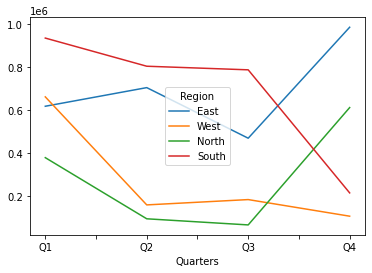

In [117]:
data.plot() #data.plot.line()의 단축 표기

플로틀리 

In [118]:
# 그래프 서버를 플로틀리로 설정합ㄴ디ㅏ
pd.options.plotting.backend = "plotly"

In [119]:
data.plot()

In [120]:
# 같은 데이터를 막대 그래프로 표시합니다
data.plot.bar(barmode="group")

# 데이터프레임 임포트와 익스포트

CSV 파일로 익스포트

In [122]:
df.to_csv("course_participants.csv")

CSV 파일 임포트 

In [123]:
msft = pd.read_csv("MSFT.csv")

In [125]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8622 entries, 0 to 8621
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8622 non-null   object 
 1   Open       8622 non-null   float64
 2   High       8622 non-null   float64
 3   Low        8622 non-null   float64
 4   Close      8622 non-null   float64
 5   Adj Close  8622 non-null   float64
 6   Volume     8622 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 471.6+ KB


In [126]:
msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062205,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065537,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063871,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062760,47894400


In [128]:
msft.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8617,2020-05-20,184.809998,185.850006,183.940002,185.660004,185.660004,31261300
8618,2020-05-21,185.399994,186.669998,183.289993,183.429993,183.429993,29119500
8619,2020-05-22,183.190002,184.460007,182.539993,183.509995,183.509995,20826900
8620,2020-05-26,186.339996,186.500000,181.100006,181.570007,181.570007,36073600
8621,2020-05-27,180.199997,181.990005,176.600006,181.809998,181.809998,39492600


In [129]:
msft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8.622000e+03
mean,29.802759,30.125323,29.473685,29.808132,24.921952,6.030722e+07
std,32.131286,32.443821,31.787810,32.135047,31.838096,3.877805e+07
min,0.088542,0.092014,0.088542,0.090278,0.057762,2.304000e+06
25%,3.523438,3.572266,3.486328,3.512695,2.247503,3.651632e+07
50%,26.304999,26.625000,26.000000,26.298437,18.454313,5.350380e+07
75%,34.728749,35.128751,34.250000,34.703752,25.699224,7.397560e+07
max,190.649994,190.699997,186.470001,188.699997,187.663330,1.031789e+09


In [131]:
url = ("https://raw.githubusercontent.com/fzumstein/"
       "python-for-excel/1st-edition/csv/MSFT.csv")
msft = pd.read_csv(url)

In [133]:
msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062205,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065537,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063871,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062760,47894400
